In [215]:
# dependencies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly
import plotly.graph_objs as go

In [216]:
# plotly credentials

plotly.tools.set_credentials_file(username="abi.mvasquez", api_key="pX9WEUeT7jYv9HAtbhHX")

### School Funding (Revenue) by State ###

In [217]:
# uploading csv and creating dataframe
rev_data = os.path.join('Resources','Stfis14_1a.csv')
rev_data_df = pd.read_csv(rev_data)
rev_data_df.head()

,SURVYEAR,FIPS,STABR,STNAME,R1A,R1B,R1C,R1D,R1E,R1F,...,A14B,PPE15,MEMBR13,ARRASTE1,ARRATE5,ARRAE81Z,ARRATE10,ARRASTE6,ARRATLEIZ,ARRASTE4
0,2014,1,AL,Alabama,-2,-2,1128860063,621382410,6131559,1033208,...,706566,8767,746204,805460,1404270,17206,0,15000,107591,0
1,2014,2,AK,Alaska,-2,-2,295232764,161453827,142222,159692,...,-2,19699,130944,20946,46923,0,0,0,0,0
2,2014,4,AZ,Arizona,2979308590,-2,-2,66772046,5748335,18493579,...,-2,7783,1102445,0,0,0,0,0,0,0
3,2014,5,AR,Arkansas,1619649401,1223591,-2,11117198,10086128,2445184,...,-2,9946,489979,1175969,4031513,0,72883,0,0,0
4,2014,6,CA,California,18407152429,933627693,168400,-2,1117595,371734184,...,-2,9740,6312623,22075494,37624403,402380,166270,0,29240684,0


In [218]:
# filtering out the wanted data
rev_data_df = rev_data_df[["SURVYEAR", "STABR", "STNAME", "STR1", "R3", "STR4", "TR", "E11", "E11A"]]
rev_data_df.head()

,SURVYEAR,STABR,STNAME,STR1,R3,STR4,TR,E11,E11A
0,2014,AL,Alabama,2479526880,4065545836,838649689,7396933084,2495972800,1775677776
1,2014,AK,Alaska,529595705,1835601093,312161832,2677358630,688001845,-1
2,2014,AZ,Arizona,3899570304,4217359201,1203567314,9594427770,3039539648,2013800192
3,2014,AR,Arkansas,1872187527,2665329194,592246357,5133841370,1818164198,1170635549
4,2014,CA,California,23107204742,39293076276,6942639777,69342920795,23880538763,17076582010


In [219]:
# using csv file key to rename columns
renamed_df = rev_data_df.rename(columns={"SURVYEAR":"YEAR", "STABR":"ST", "STNAME":"STATE", 
                                         "STR1":"LOCAL REVENUES SUBTOTAL", 
                                        "R3":"STATE REVENUES", "STR4":"FEDERAL REVENUES SUBTOTAL", 
                                        "TR":"TOTAL REVENUES FROM ALL SOURCES", 
                                         "E11":"INSTRUCTIONAL EXPENDITURES SALARIES", 
                                        "E11A":"TEACHER SALARIES REGULAR PROGRAMS"})
renamed_df.head()

,YEAR,ST,STATE,LOCAL REVENUES SUBTOTAL,STATE REVENUES,FEDERAL REVENUES SUBTOTAL,TOTAL REVENUES FROM ALL SOURCES,INSTRUCTIONAL EXPENDITURES SALARIES,TEACHER SALARIES REGULAR PROGRAMS
0,2014,AL,Alabama,2479526880,4065545836,838649689,7396933084,2495972800,1775677776
1,2014,AK,Alaska,529595705,1835601093,312161832,2677358630,688001845,-1
2,2014,AZ,Arizona,3899570304,4217359201,1203567314,9594427770,3039539648,2013800192
3,2014,AR,Arkansas,1872187527,2665329194,592246357,5133841370,1818164198,1170635549
4,2014,CA,California,23107204742,39293076276,6942639777,69342920795,23880538763,17076582010


In [220]:
# school funding (revenue) by state data in map
trc = dict(type='choropleth', locations=renamed_df["ST"], locationmode='USA-states', colorscale='Greens',
          z=renamed_df["TOTAL REVENUES FROM ALL SOURCES"], colorbar = dict(
            title = "Billions of Dollars"))

layout=dict(geo=dict(scope='usa'),  title = 'School Funding (Revenue) by State')
map=go.Figure(data=[trc], layout=layout)

plt.savefig('SchoolFunding.png')
py.iplot(map)

### Teen Pregnancy Rate by State ###

In [221]:
# import super janky csv and create dataframe
#https://www.cdc.gov/nchs/pressroom/sosmap/teen-births/teenbirths.htm
# birth rate is (number of births) x 1000 / estimated population at mid-year
preg_data = os.path.join('Resources','TEENBIRTHS2016.csv')
preg_data_df = pd.read_csv(preg_data)
preg_data_df = preg_data_df.rename(columns={"STATE":"ST"})
preg_data_df.head()

,ST,RATE,URL
0,AL,28.4,/nchs/pressroom/states/alabama/alabama.htm
1,AK,25.8,/nchs/pressroom/states/alaska/alaska.htm
2,AZ,23.6,/nchs/pressroom/states/arizona/arizona.htm
3,AR,34.6,/nchs/pressroom/states/arkansas/arkansas.htm
4,CA,17.0,/nchs/pressroom/states/california/california.htm


In [222]:
# teen pregnancy rate by state data map
trc = dict(type='choropleth', locations=preg_data_df["ST"], locationmode='USA-states', colorscale='Reds',
          z=preg_data_df["RATE"], colorbar = dict(
            title = "Percent (%)"))

layout=dict(geo=dict(scope='usa'),  title = 'Teen Pregnancy Rates per State')
map=go.Figure(data=[trc], layout=layout)

plt.savefig('PregnancyRate.png')
py.iplot(map)

### Spending per Student by State ###

In [223]:
# import csv and create dataframe
#https://www.census.gov/data/tables/2014/econ/school-finances/secondary-education-finance.html
stu_spend = os.path.join('Resources','studentspending.csv')
stu_spend_df = pd.read_csv(stu_spend)
stu_spend_df = stu_spend_df.rename(columns={"State":"ST"})
stu_spend_df.head()

,ST,Spending per Student
0,DC,29865.60
1,NY,23326.89
2,CT,20576.57
3,NJ,20525.21
4,AK,20403.77


In [224]:
# spending per student by state data map
trc = dict(type='choropleth', locations=stuspend_df["ST"], locationmode='USA-states', colorscale='Greens',
          z=stuspend_df["Spending per Student"], colorbar = dict(title = "Thousands of Dollars"))
lyt=dict(geo=dict(scope='usa'), title = 'Spending per Student by State')
map=go.Figure(data=[trc], layout=lyt)

plt.savefig('SpendingPerStudent.png')
py.iplot(map)

### Average SAT Scores by State ###

In [225]:
# import csv and create dataframe
sat_scores = os.path.join('Resources', 'SATscores.csv')
sat_df = pd.read_csv(sat_scores)
sat_df.head()

,State,State1,Average New SAT Score,Participation Rate
0,AL,Alabama,998,7%
1,AK,Alaska,1037,54%
2,AZ,Arizona,1045,36%
3,AR,Arkansas,1034,4%
4,CA,California,1053,60%


In [241]:
satdf = sat_df.rename(columns={"State":"ST"})
satdf.head()

,ST,State1,Average New SAT Score,Participation Rate
0,AL,Alabama,998,7%
1,AK,Alaska,1037,54%
2,AZ,Arizona,1045,36%
3,AR,Arkansas,1034,4%
4,CA,California,1053,60%


In [227]:
# average SAT scores by state data map
satdf = dict(type='choropleth', locations=satdf['ST'], locationmode='USA-states', colorscale='Blues',
        z=satdf['Average New SAT Score'], colorbar = dict(
          title = "Average SAT Score"))

layout=dict(geo=dict(scope='usa'),  title = 'Average SAT Score per State')
map=go.Figure(data=[satdf], layout=layout)

plt.savefig('SATScores.png')
py.iplot(map)

### Average Graduation Rates by State ###

In [228]:
# import csv and create dataframe
grad_rates = os.path.join('Resources','gradrates.csv')
grad_df = pd.read_csv(grad_rates)
grad_df = grad_df.rename(columns={"State":"ST"})
grad_df.head()

,ST,State1,Average Rate,American Indian/Alaska Native,Asian/Pacific Islander,Hispanic,Black,White
0,AL,Alabama,0.871,0.900,0.910,0.870,0.845,0.886
1,AK,Alaska,0.761,0.640,0.810,0.760,0.740,0.808
2,AZ,Arizona,0.795,0.677,0.890,0.764,0.755,0.840
3,AR,Arkansas,0.870,0.870,0.870,0.857,0.815,0.892
4,CA,California,0.830,0.740,0.929,0.800,0.730,0.880


In [229]:
sorted_grad = grad_df.sort_values(by=["Average Rate"], ascending=False)
sorted_grad.head()

,ST,State1,Average Rate,American Indian/Alaska Native,Asian/Pacific Islander,Hispanic,Black,White
15,KS,Iowa,0.913,0.81,0.910,0.850,0.800,0.929
30,NM,New Jersey,0.901,0.83,0.967,0.833,0.821,0.942
48,WI,West Virginia,0.898,0.00,NaN,0.890,0.880,0.899
27,NV,Nebraska,0.893,0.74,0.810,0.818,0.790,0.926
43,UT,Texas,0.891,0.87,0.954,0.869,0.854,0.934


### Average Teacher Salary by State ###

In [230]:
teacher_salary = os.path.join('Resources', 'teachersalary.csv')
teacher_df = pd.read_csv(teacher_salary)
teacher_df = teacher_df.rename(columns={"State":"ST"})
teacher_df.head()

,ST,STATE1,AVERAGE STARTING SALARY,AVERAGE SALARY
0,AL,Alabama,36198,47949
1,AK,Alaska,44166,65468
2,AZ,Arkansas,32691,46632
3,AR,Arizona,31874,49885
4,CA,California,41259,69324


### High School Grad Rates ###

In [231]:
# importing csv and creating dataframe ***need csv

csv = os.path.join('Resources', 'Hsgradrates2.csv')
hsgraddf = pd.read_csv(csv)
hsgraddf.head()

,Unnamed: 0,States,2014-15,White,Black,Hispanic,Asian Pacific Islander,Asian Pacific Islander,Students with disabil-ities,Limited English Proficient,Economically disadvan-taged
0,0,United States,83,88,75,78,90.0,72.0,65,65,76
1,1,Alabama,89,91,87,90,93.0,90.0,72,75,85
2,2,Alaska,76,80,71,72,83.0,64.0,57,56,67
3,3,Arizona,77,83,73,73,87.0,67.0,64,34,73
4,4,Arkansas,85,87,78,85,86.0,80.0,82,86,82


In [232]:
hsgraddf["ST"] = ['US','AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA',
                  'KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM',
                  'NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA',
                  'WV','WI','WY']
hsgraddf = hsgraddf[["ST","States", "2014-15","White", "Black", "Hispanic", "Asian Pacific Islander", 
                     "Asian Pacific Islander", "Students with disabil-ities", "Limited English Proficient",
                    "Economically disadvan-taged"]]
hsgraddf.head()

,ST,States,2014-15,White,Black,Hispanic,Asian Pacific Islander,Asian Pacific Islander,Students with disabil-ities,Limited English Proficient,Economically disadvan-taged
0,US,United States,83,88,75,78,72.0,72.0,65,65,76
1,AL,Alabama,89,91,87,90,90.0,90.0,72,75,85
2,AK,Alaska,76,80,71,72,64.0,64.0,57,56,67
3,AZ,Arizona,77,83,73,73,67.0,67.0,64,34,73
4,AR,Arkansas,85,87,78,85,80.0,80.0,82,86,82


In [233]:
trc = dict(type='choropleth', locations=['US','AL','AK','AZ','AR','CA','CO','CT','DE','DOC','FL','GA','HI','ID','IL','IN','IA',
                                         'KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM',
                                         'NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA',
                                         'WV','WI','WY']
, locationmode='USA-states', colorscale='YlOrRd',
           z=hsgraddf['2014-15'], colorbar = dict(
            title = 'Percent (%)'))
lyt=dict(geo=dict(scope='usa'))
map=go.Figure(data=[trc], layout=lyt)

py.iplot(map)

### Graduation by Income ###

In [234]:

# http://gradnation.americaspromise.org/sites/default/files/d8/2017-05/Appendix_G.pdf
# used adobe acrobat pro to convert the PDF to excel format
csv_glor = os.path.join('Resources', 'Main_data_AppendixG.csv')
df = pd.read_csv(csv_glor)
df["Overall 2015 \nACGR(%)"]*=100
df["Percent of Low-Income \nStudents in the \nCohort, 2015 (%)"]*=100
df["Estimated \nNon-Low-Income 2015 ACGR(%)"]*=100
df["Low-Income 2015\nACGR(%)"]*=100
df.head()

,Abb,State,"Gap between Non-Low Income and Low-Income ACGR (Percentage Points), 2011",Overall 2015 ACGR(%),"Percent of Low-Income Students in the Cohort, 2015 (%)",Estimated Non-Low-Income 2015 ACGR(%),Low-Income 2015 ACGR(%),"Gap between Non-Low Income and Low-Income ACGR (Percentage Points, 2015","Gap Change between Non-Low-Income and Low-Income ACGR (Percentage points), 2011-15"
0,AL,Alabama*,19.73,89.3%89.3%89.3%89.3%89.3%89.3%89.3%89.3%89.3%8...,49.5%49.5%49.5%49.5%49.5%49.5%49.5%49.5%49.5%4...,93.8%93.8%93.8%93.8%93.8%93.8%93.8%93.8%93.8%9...,84.7%84.7%84.7%84.7%84.7%84.7%84.7%84.7%84.7%8...,9.1,10.6
1,AK,Alaska,18.28,75.6%75.6%75.6%75.6%75.6%75.6%75.6%75.6%75.6%7...,35.8%35.8%35.8%35.8%35.8%35.8%35.8%35.8%35.8%3...,80.6%80.6%80.6%80.6%80.6%80.6%80.6%80.6%80.6%8...,66.6%66.6%66.6%66.6%66.6%66.6%66.6%66.6%66.6%6...,14.0,4.2
2,AZ,Arizona,7.94,77.4%77.4%77.4%77.4%77.4%77.4%77.4%77.4%77.4%7...,39.7%39.7%39.7%39.7%39.7%39.7%39.7%39.7%39.7%3...,80.2%80.2%80.2%80.2%80.2%80.2%80.2%80.2%80.2%8...,73.1%73.1%73.1%73.1%73.1%73.1%73.1%73.1%73.1%7...,7.1,0.8
3,AR,Arkansas,12.14,84.9%84.9%84.9%84.9%84.9%84.9%84.9%84.9%84.9%8...,49.6%49.6%49.6%49.6%49.6%49.6%49.6%49.6%49.6%4...,88.1%88.1%88.1%88.1%88.1%88.1%88.1%88.1%88.1%8...,81.7%81.7%81.7%81.7%81.7%81.7%81.7%81.7%81.7%8...,6.4,5.8
4,CA,California,15.49,82.0%82.0%82.0%82.0%82.0%82.0%82.0%82.0%82.0%8...,67.2%67.2%67.2%67.2%67.2%67.2%67.2%67.2%67.2%6...,90.2%90.2%90.2%90.2%90.2%90.2%90.2%90.2%90.2%9...,78.0%78.0%78.0%78.0%78.0%78.0%78.0%78.0%78.0%7...,12.2,3.3


In [235]:
# df.plot(x="Abb",
#         y=["Percent of Low-Income \nStudents in the \nCohort, 2015 (%)",
#           "Estimated \nNon-Low-Income 2015 ACGR(%)"], kind="bar", figsize=(20,20), fontsize=12, legend = True)

# plt.title("Estimated High School graduation based on Household Income 2011-2015", size = 22)
# plt.xlabel("US States", size = 22)
# plt.ylabel("Estimated Graduation Rates", size = 22)

In [236]:
# df.plot(x="Abb", y="Gap Change between Non-Low-Income\n and Low-Income ACGR\n(Percentage points), 2011-15", kind="bar", figsize=(20,20), fontsize=12)

# plt.title('Adjusted Cohort Graduation Rate (ACGR) by State, Percent Low-Income, ACGR Low-Income,ACGR Estimated Non-Low-Income, Gap between Low-Income and Non-Low-Income, and Gap Change 2011-2015')
# plt.xlabel('US Sates', size=18)
# plt.ylabel('Adjusted Cohort Graduation Rate',size=18)

### Merging Dataframes ###

In [237]:
# merging school funding and pregnancy rate
merge_table = pd.merge(renamed_df, preg_data_df, on="ST", how="outer")
merge_table.head()

,YEAR,ST,STATE,LOCAL REVENUES SUBTOTAL,STATE REVENUES,FEDERAL REVENUES SUBTOTAL,TOTAL REVENUES FROM ALL SOURCES,INSTRUCTIONAL EXPENDITURES SALARIES,TEACHER SALARIES REGULAR PROGRAMS,RATE,URL
0,2014,AL,Alabama,2479526880,4065545836,838649689,7396933084,2495972800,1775677776,28.4,/nchs/pressroom/states/alabama/alabama.htm
1,2014,AK,Alaska,529595705,1835601093,312161832,2677358630,688001845,-1,25.8,/nchs/pressroom/states/alaska/alaska.htm
2,2014,AZ,Arizona,3899570304,4217359201,1203567314,9594427770,3039539648,2013800192,23.6,/nchs/pressroom/states/arizona/arizona.htm
3,2014,AR,Arkansas,1872187527,2665329194,592246357,5133841370,1818164198,1170635549,34.6,/nchs/pressroom/states/arkansas/arkansas.htm
4,2014,CA,California,23107204742,39293076276,6942639777,69342920795,23880538763,17076582010,17.0,/nchs/pressroom/states/california/california.htm


In [238]:
merge_table = merge_table[["ST","STATE REVENUES", 
                           "TOTAL REVENUES FROM ALL SOURCES","RATE"]]

In [239]:
final_merge = merge_table.rename(columns={"RATE":"PREGNANCY RATE"})
final_merge.head()

,ST,STATE REVENUES,TOTAL REVENUES FROM ALL SOURCES,PREGNANCY RATE
0,AL,4065545836,7396933084,28.4
1,AK,1835601093,2677358630,25.8
2,AZ,4217359201,9594427770,23.6
3,AR,2665329194,5133841370,34.6
4,CA,39293076276,69342920795,17.0


In [242]:
# merging spending per student and average SAT
merge2 = pd.merge(satdf, stuspend_df, on="ST", how="outer")
merge2.head()


,ST,State1,Average New SAT Score,Participation Rate,Spending per Student
0,AL,Alabama,998.0,7%,9938.84
1,AK,Alaska,1037.0,54%,20403.77
2,AZ,Arizona,1045.0,36%,8786.17
3,AR,Arkansas,1034.0,4%,10785.03
4,CA,California,1053.0,60%,11222.72


In [243]:
merge2 = merge2[["ST","Average New SAT Score", "Spending per Student"]]
merge2.head()

,ST,Average New SAT Score,Spending per Student
0,AL,998.0,9938.84
1,AK,1037.0,20403.77
2,AZ,1045.0,8786.17
3,AR,1034.0,10785.03
4,CA,1053.0,11222.72


In [244]:
# merging school funding, pregnancy rate, spending per student, and average SAT
merge3 = pd.merge(merge2, final_merge, on="ST", how="outer")

In [245]:
# merging average graduation rates and average teacher salary
merge4 = pd.merge(sorted_grad, teacher_df, on="ST", how="outer")
merge4 = merge4[["ST","Average Rate", "American Indian/Alaska Native", "Asian/Pacific Islander", "Hispanic", "Black",
                "White", "AVERAGE STARTING SALARY", "AVERAGE SALARY"]]

merge4.head()

,ST,Average Rate,American Indian/Alaska Native,Asian/Pacific Islander,Hispanic,Black,White,AVERAGE STARTING SALARY,AVERAGE SALARY
0,KS,0.913,0.81,0.910,0.850,0.800,0.929,34696,51456
1,NM,0.901,0.83,0.967,0.833,0.821,0.942,34280,55599
2,WI,0.898,0.00,NaN,0.890,0.880,0.899,33546,55171
3,NV,0.893,0.74,0.810,0.818,0.790,0.926,30778,45947
4,UT,0.891,0.87,0.954,0.869,0.854,0.934,38091,48110


In [246]:
merge4_fin = merge4.rename(columns={"Average Rate":"Average Graduation Rate", 
                                        "American Indian/Alaska Native":"Average Graduation Rate (American Indian/Alaska Native)",
                                       "Asian/Pacific Islander":"Average Graduation Rate (Asian/Pacific Islander)",
                                       "Hispanic":"Average Graduation Rate (Hispanic)",
                                       "Black":"Average Graduation Rate (Black)",
                                       "White":"Average Graduation Rate (White)",
                                       "AVERAGE STARTING SALARY":"Average Starting Teacher Salary",
                                   "AVERAGE SALARY":"Average Teacher Salary"})
merge4_fin.head()

,ST,Average Graduation Rate,Average Graduation Rate (American Indian/Alaska Native),Average Graduation Rate (Asian/Pacific Islander),Average Graduation Rate (Hispanic),Average Graduation Rate (Black),Average Graduation Rate (White),Average Starting Teacher Salary,Average Teacher Salary
0,KS,0.913,0.81,0.910,0.850,0.800,0.929,34696,51456
1,NM,0.901,0.83,0.967,0.833,0.821,0.942,34280,55599
2,WI,0.898,0.00,NaN,0.890,0.880,0.899,33546,55171
3,NV,0.893,0.74,0.810,0.818,0.790,0.926,30778,45947
4,UT,0.891,0.87,0.954,0.869,0.854,0.934,38091,48110


In [247]:
compiled1 = pd.merge(merge4_fin, merge3, on="ST", how="outer")

In [248]:
compiled1 = compiled1.rename(columns={"STATE REVENUES":"State Revenues ($)", 
                                        "TOTAL REVENUES FROM ALL SOURCES":"Total Revenues From All Sources ($)",
                                       "PREGNANCY RATE":"Pregnancy Rate (%)"})
compiled1.head()

,ST,Average Graduation Rate,Average Graduation Rate (American Indian/Alaska Native),Average Graduation Rate (Asian/Pacific Islander),Average Graduation Rate (Hispanic),Average Graduation Rate (Black),Average Graduation Rate (White),Average Starting Teacher Salary,Average Teacher Salary,Average New SAT Score,Spending per Student,State Revenues ($),Total Revenues From All Sources ($),Pregnancy Rate (%)
0,KS,0.913,0.81,0.910,0.850,0.800,0.929,34696.0,51456.0,1098.0,11717.66,3.298508e+09,6.065210e+09,21.9
1,NM,0.901,0.83,0.967,0.833,0.821,0.942,34280.0,55599.0,1104.0,11025.66,2.645457e+09,3.779535e+09,29.8
2,WI,0.898,0.00,NaN,0.890,0.880,0.899,33546.0,55171.0,963.0,12716.48,4.981241e+09,1.098072e+10,15.0
3,NV,0.893,0.74,0.810,0.818,0.790,0.926,30778.0,45947.0,1070.0,9641.57,1.560330e+09,4.341723e+09,24.2
4,UT,0.891,0.87,0.954,0.869,0.854,0.934,38091.0,48110.0,1026.0,7714.19,2.673267e+09,4.905540e+09,15.6


In [249]:
final_dataframe = compiled1.drop([38, 51, 52, 53, 54, 55, 56])
edu_fin = final_dataframe.reset_index()

In [250]:
education_final = edu_fin.drop('index', axis=1)
education_final

,ST,Average Graduation Rate,Average Graduation Rate (American Indian/Alaska Native),Average Graduation Rate (Asian/Pacific Islander),Average Graduation Rate (Hispanic),Average Graduation Rate (Black),Average Graduation Rate (White),Average Starting Teacher Salary,Average Teacher Salary,Average New SAT Score,Spending per Student,State Revenues ($),Total Revenues From All Sources ($),Pregnancy Rate (%)
0,KS,0.913,0.810,0.910,0.850,0.800,0.929,34696.0,51456.0,1098.0,11717.66,3.298508e+09,6.065210e+09,21.9
1,NM,0.901,0.830,0.967,0.833,0.821,0.942,34280.0,55599.0,1104.0,11025.66,2.645457e+09,3.779535e+09,29.8
2,WI,0.898,0.000,NaN,0.890,0.880,0.899,33546.0,55171.0,963.0,12716.48,4.981241e+09,1.098072e+10,15.0
3,NV,0.893,0.740,0.810,0.818,0.790,0.926,30778.0,45947.0,1070.0,9641.57,1.560330e+09,4.341723e+09,24.2
4,UT,0.891,0.870,0.954,0.869,0.854,0.934,38091.0,48110.0,1026.0,7714.19,2.673267e+09,4.905540e+09,15.6
5,MT,0.890,0.860,0.920,0.831,0.790,0.916,31184.0,41994.0,1089.0,11889.51,8.325352e+08,1.723235e+09,23.7
6,LA,0.886,0.830,0.930,0.820,0.809,0.900,35166.0,50326.0,1064.0,12507.53,3.794407e+09,8.733819e+09,30.6
7,TX,0.885,0.860,0.930,0.837,0.823,0.913,34098.0,48289.0,1054.0,10629.22,2.212761e+10,5.337715e+10,31.0
8,WY,0.882,0.780,0.890,0.799,0.642,0.927,32533.0,46405.0,1096.0,19098.34,9.651595e+08,1.771864e+09,26.1
9,NJ,0.882,0.740,0.920,0.760,0.780,0.892,30844.0,48931.0,1101.0,20525.21,1.112216e+10,2.736382e+10,11.0


### Scatter Plot of Graduation Rates Based on Race ###

In [251]:
trace1 = go.Scatter(
    x=['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN',
       'IA','KS','KY','LA','ME','MD','MA','MI','MN',
       'MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR',
       'PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY'],
    y=grad_df['Average Rate'],
    name='Average Combined',
    yaxis='Average Combined',
    mode = 'markers'
)
trace2 = go.Scatter(
    x=['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN',
       'IA','KS','KY','LA','ME','MD','MA','MI','MN',
       'MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR',
       'PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY'],
    y=grad_df['American Indian/Alaska Native'],
    name='American Indian/Alaska Native',
    yaxis='American Indian/Alaska Native',
    mode = 'markers'
)
trace3 = go.Scatter(
    x=['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN',
       'IA','KS','KY','LA','ME','MD','MA','MI','MN',
       'MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR',
       'PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY'],
    y=grad_df['Asian/Pacific Islander'],
    name='Asian/Pacific Islander',
    yaxis='Asian/Pacific Islander',
    mode = 'markers'
)
trace4 = go.Scatter(
    x=['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN',
       'IA','KS','KY','LA','ME','MD','MA','MI','MN',
       'MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR',
       'PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY'],
    y=grad_df['Hispanic'],
    name='Hispanic',
    yaxis='Hispanic',
    mode = 'markers'
)
trace5 = go.Scatter(
    x=['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN',
       'IA','KS','KY','LA','ME','MD','MA','MI','MN',
       'MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR',
       'PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY'],
    y=grad_df['Black'],
    name='Black',
    yaxis='Black',
    mode = 'markers'
)
trace6 = go.Scatter(
    x=['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN',
       'IA','KS','KY','LA','ME','MD','MA','MI','MN',
       'MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR',
       'PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY'],
    y=grad_df['White'],
    name='White',
    yaxis='White',
    mode = 'markers'
)
data = [trace1, trace2, trace3, trace4, trace5, trace6]
layout = go.Layout(
    title='Average Graduation Rates Based on Race',
    width=800,
    xaxis=dict(
        domain=[0.1, 0.9]
    ),
    yaxis=dict(
        title='Average Combined Graduation Rate',
        titlefont=dict(
            color='#1f77b4'
        ),
        tickfont=dict(
            color='#1f77b4'
        )
    ),
    yaxis2=dict(
        title='Average American Indian/Alaska Native Graduation Rate',
        titlefont=dict(
            color='#ff7f0e'
        ),
        tickfont=dict(
            color='#ff7f0e'
        ),
        anchor='free',
        overlaying='y',
        side='left',
        position=0.15
),
    yaxis3=dict(
        title='Average Asian/Pacific Islander Graduation Rate',
        titlefont=dict(
            color='#d62728'
        ),
        tickfont=dict(
            color='#d62728'
        ),
        anchor='x',
        overlaying='y',
        side='right'
    ),
    yaxis4=dict(
        title='Average Hispanic Graduation Ratee',
        titlefont=dict(
            color='#9467bd'
        ),
        tickfont=dict(
            color='#9467bd'
        ),
        anchor='free',
        overlaying='y',
        side='right',
        position=0.85
    ),
    yaxis5=dict(
        title='Average Black Graduation Ratee',
        titlefont=dict(
            color='#4567bd'
        ),
        tickfont=dict(
            color='#4567bd'
        ),
        anchor='free',
        overlaying='y',
        side='right',
        position=0.85
    ),
    yaxis6=dict(
        title='Average White Graduation Ratee',
        titlefont=dict(
            color='#010101'
        ),
        tickfont=dict(
            color='#010101'
        ),
        anchor='free',
        overlaying='y',
        side='right',
        position=0.85
    )
)
fig = go.Figure(data=data, layout=layout)
plot_url = py.plot(fig, filename='multiple-axes-multiple')

### Graduation Rate v. Average Teacher Salary ###

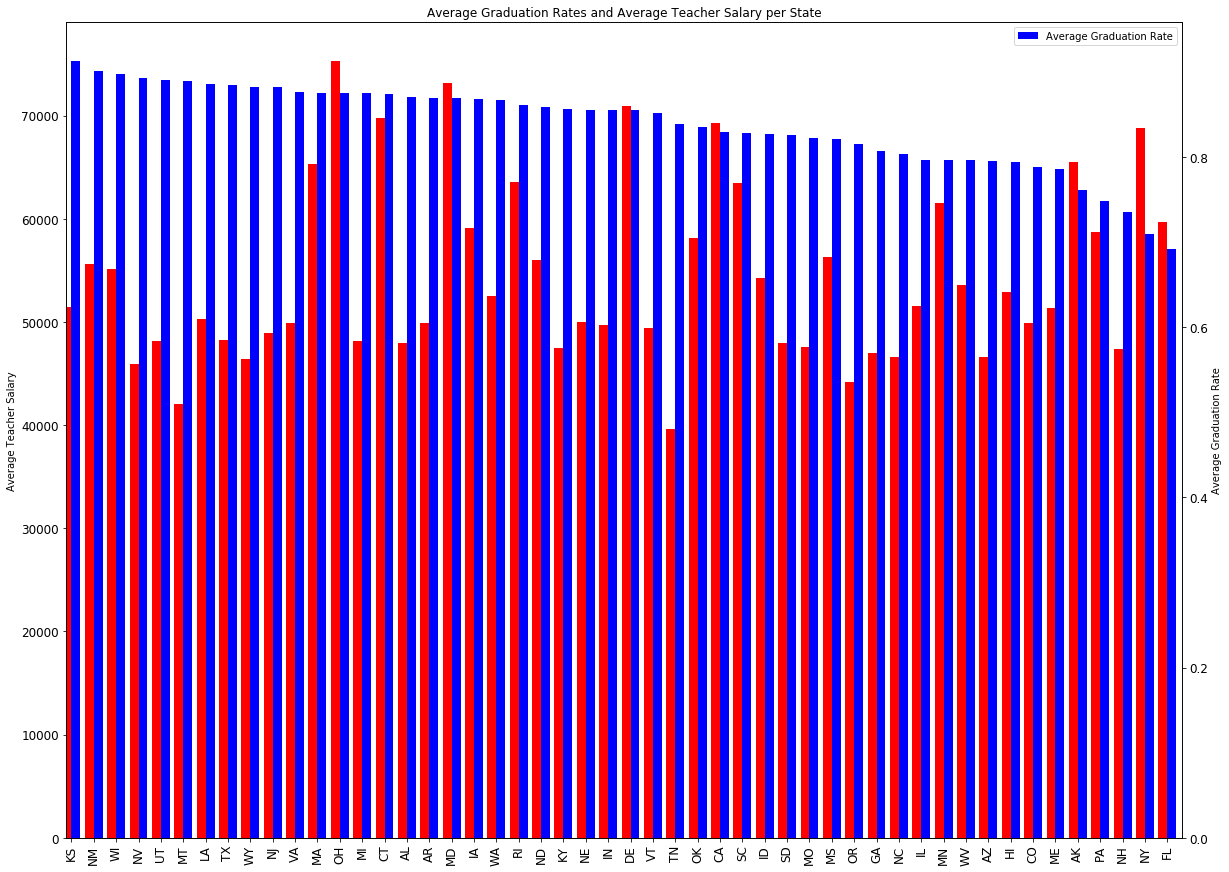

In [252]:
# comparing Graduation rate with Average Teacher Salary
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
y_pos = np.arange(len(education_final))
width = 0.4
education_final['Average Teacher Salary'].plot(kind='bar', color='red', ax=ax, width=width, position=1,
                                         title ="Average Graduation Rates and Average Teacher Salary per State",
                                         figsize=(20,15), fontsize=12)
education_final['Average Graduation Rate'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0, figsize=(20,15),
                                         fontsize=12)
plt.xticks(y_pos, education_final['ST'])
ax.set_ylabel('Average Teacher Salary')
ax2.set_ylabel('Average Graduation Rate')
plt.legend(loc='best')

plt.savefig('GradRates_vs_Salary.png')
plt.show()

### Graduation Rate vs. Average SAT Score ###

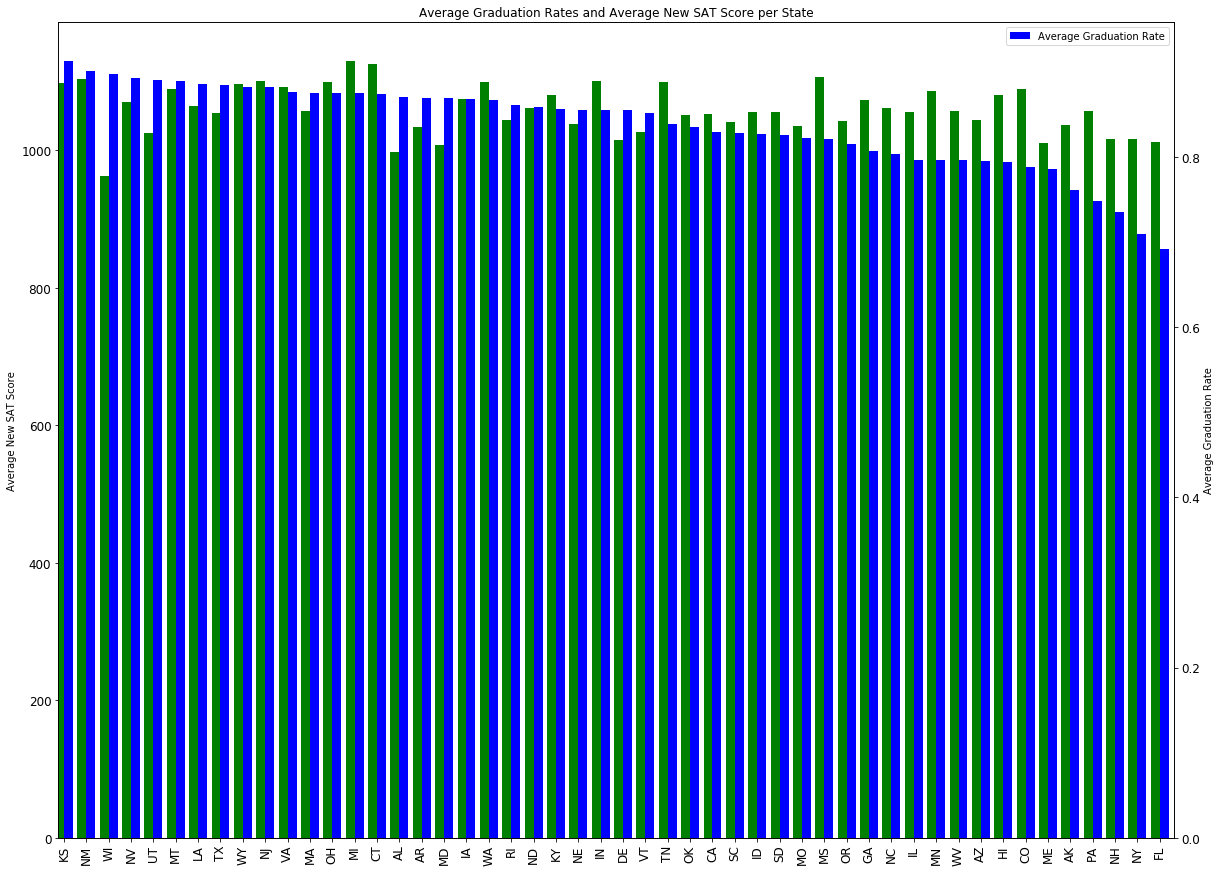

In [253]:
# comparing Graduation rate with Average SAT Score
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
y_pos = np.arange(len(education_final))
width = 0.4
education_final['Average New SAT Score'].plot(kind='bar', color='green', ax=ax, width=width, position=1,
                                         title ="Average Graduation Rates and Average New SAT Score per State",
                                         figsize=(20,15), fontsize=12)
education_final['Average Graduation Rate'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0, figsize=(20,15),
                                         fontsize=12)
plt.xticks(y_pos, education_final['ST'])
ax.set_ylabel('Average New SAT Score')
ax2.set_ylabel('Average Graduation Rate')
plt.legend(loc='best')

plt.savefig('GradRates_vs_SAT.png')
plt.show()

### Graduation Rate vs. Pregnancy Rate ###

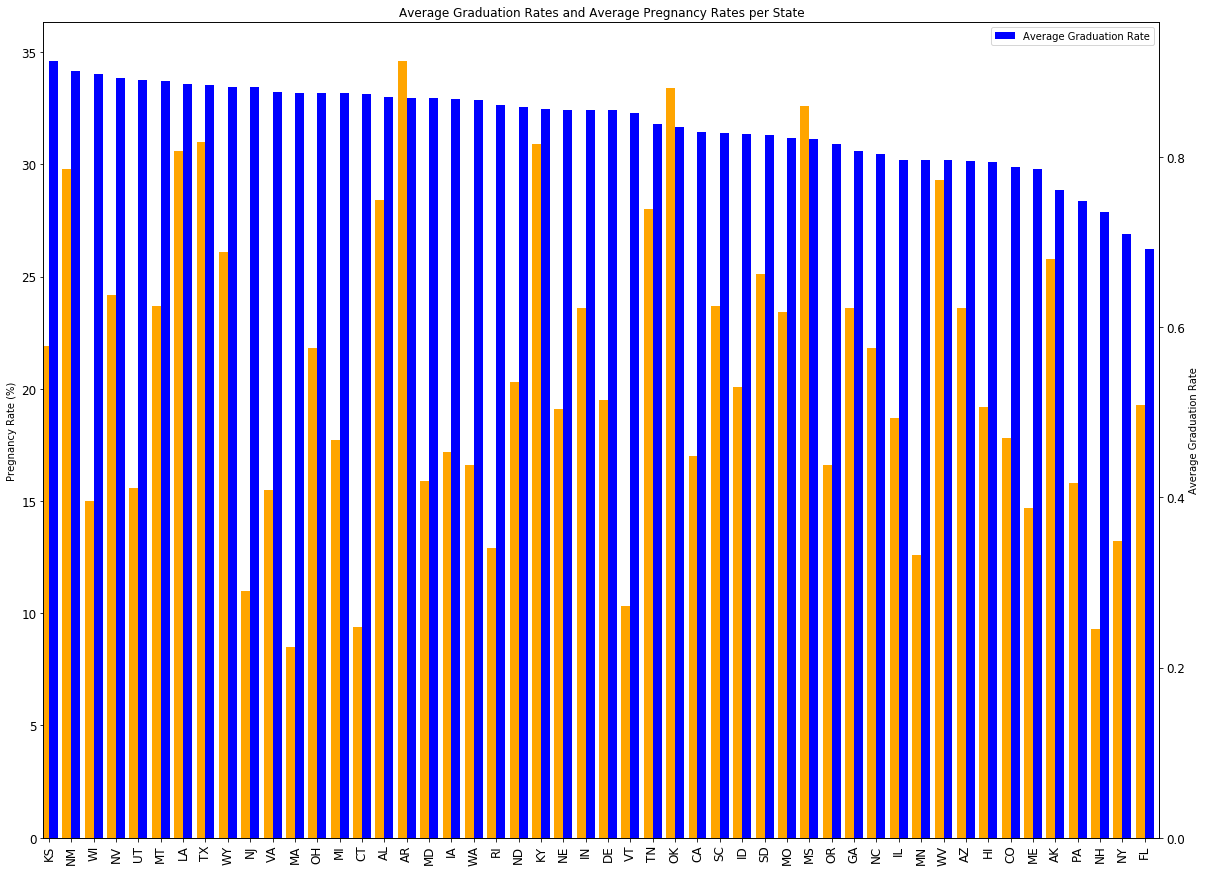

In [255]:
# comparing Graduation rate with Pregnancy Rate
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
y_pos = np.arange(len(education_final))
width = 0.4
education_final['Pregnancy Rate (%)'].plot(kind='bar', color='orange', ax=ax, width=width, position=1,
                                         title ="Average Graduation Rates and Average Pregnancy Rates per State",
                                         figsize=(20,15), fontsize=12)
education_final['Average Graduation Rate'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0, figsize=(20,15),
                                         fontsize=12)
plt.xticks(y_pos, education_final['ST'])
ax.set_ylabel('Pregnancy Rate (%)')
ax2.set_ylabel('Average Graduation Rate')
plt.legend(loc='best')

plt.savefig('GradRates_vs_PregRate.png')
plt.show()

### Gradution Rates vs. Spending per Student ###

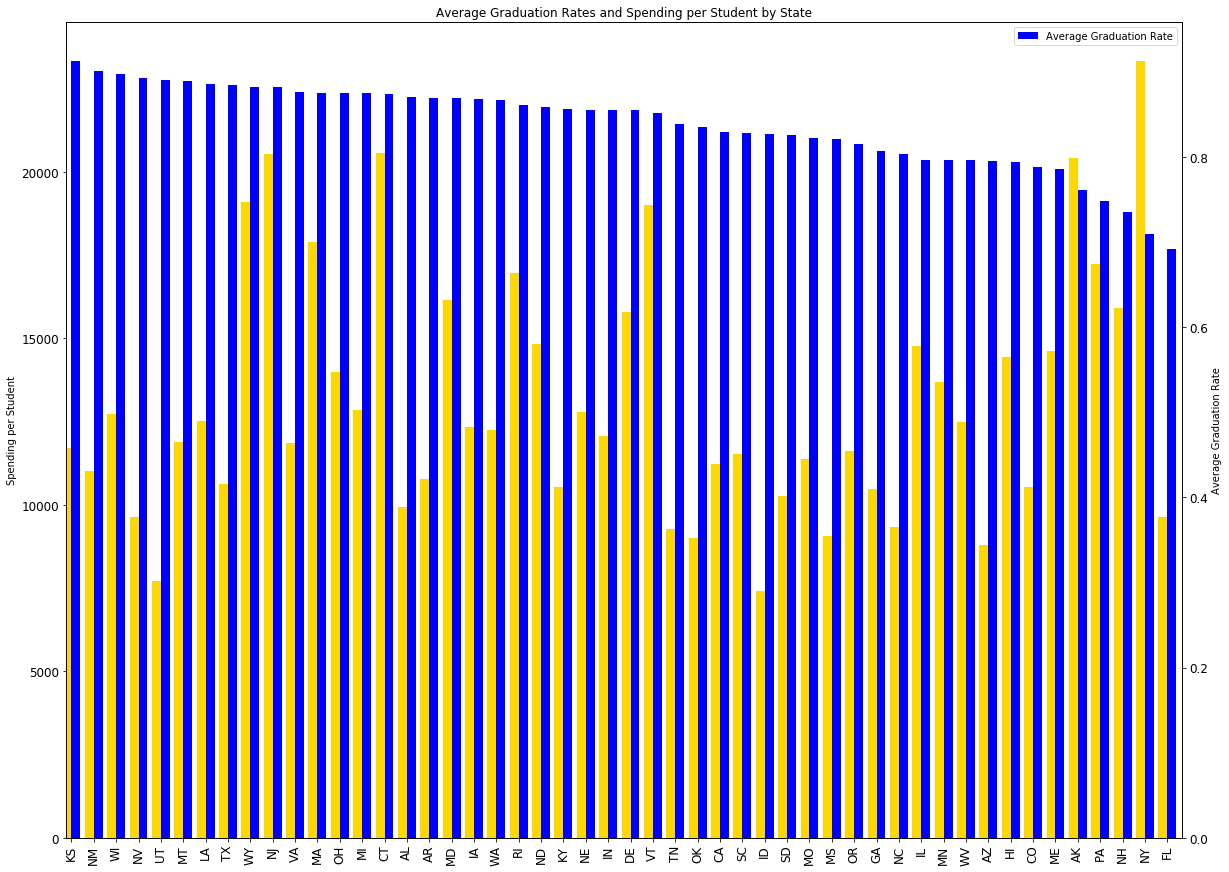

In [256]:
# comparing Graduation Rates with Spending per Student
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
y_pos = np.arange(len(education_final))
width = 0.4
education_final['Spending per Student'].plot(kind='bar', color='gold', ax=ax, width=width, position=1,
                                         title ="Average Graduation Rates and Spending per Student by State",
                                         figsize=(20,15), fontsize=12)
education_final['Average Graduation Rate'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0, figsize=(20,15),
                                         fontsize=12)
plt.xticks(y_pos, education_final['ST'])
ax.set_ylabel('Spending per Student')
ax2.set_ylabel('Average Graduation Rate')
plt.legend(loc='best')

plt.savefig('GradRates_vs_StuSpend.png')
plt.show()